## Details

* Author: Vikram S. Negi
* Roll No: 20930021010
* Batch: FinTech

In [1]:
from pandas_datareader import data
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
# get data from the yahoo finance api
apple = data.DataReader("AAPL", start="2018-1-1", end="2019-12-24", data_source="yahoo")

tesla = data.DataReader("TSLA", start="2018-1-1", end="2019-12-24", data_source="yahoo")

microsoft = data.DataReader("MSFT", start="2018-1-1", end="2019-12-24", data_source="yahoo")

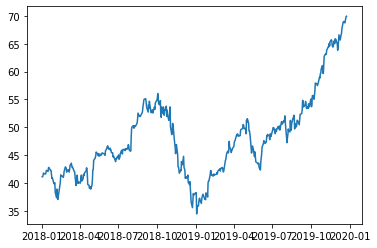

In [4]:
plt.plot(apple.index, apple["Adj Close"])

In [5]:
# simple_test = apple.loc["2019-1-1" : "2019-12-24"]

# only19 = apple.index.year == 2019
# apple[only19]


In [6]:
#Merge the dataframe with adj. closing price
#compute returns for each day
#Find average profitable days in a month
#find correlation between the stock prices
#Find the dates for the highs and the lows of each stock
#Whats the net return for all stocks

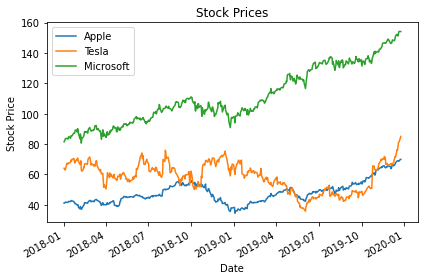

In [7]:
df = pd.concat([apple["Adj Close"], tesla["Adj Close"], microsoft["Adj Close"]], axis=1)
df.rename({0: "Date", 1: "Apple", 2: "Tesla", 3: "Microsoft"}, axis="columns")

df.columns = ["Apple", "Tesla", "Microsoft"]
df.plot(ylabel="Stock Price", title="Stock Prices")
plt.tight_layout()
plt.show()


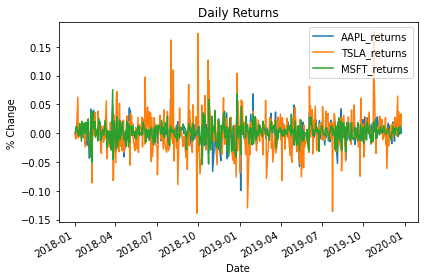

In [8]:
# Method 1
# returns = df/df.shift(1) - 1

# Method 2
returns = df.pct_change()
returns.iloc[0, :] = 0
returns.columns = ["AAPL_returns", "TSLA_returns", "MSFT_returns"]
returns.plot(ylabel="% Change", title="Daily Returns")
plt.tight_layout()
plt.show()


In [9]:
#Find average profitable days in a month

returns.head()
# df.index
# pd.DatetimeIndex(df.index).to_period("M")

monthly_gb = returns.groupby([returns.index.year, returns.index.month])

# sum of all positive returns
# sum_of_positive_returns = monthly_gb.aggregate([("Sum_Positive", lambda x: x[x > 0].sum()), ("Count", lambda x: x[x>0].count())])

# count of all days, where returns are positive
profitable_days = monthly_gb.aggregate([("Profitable Days", lambda x: x[x>0].count())])

profitable_days.loc["Average profitable days in a month"] = profitable_days.mean()
round(profitable_days.iloc[-1])


AAPL_returns  Profitable Days    11.0
TSLA_returns  Profitable Days    10.0
MSFT_returns  Profitable Days    12.0
Name: Average profitable days in a month, dtype: float64

In [10]:
#find correlation between the stock prices

returns.head()

returns_corr = returns.corr(method="pearson")
returns_corr

,AAPL_returns,TSLA_returns,MSFT_returns
AAPL_returns,1.000000,0.323235,0.663753
TSLA_returns,0.323235,1.000000,0.349160
MSFT_returns,0.663753,0.349160,1.000000


> From the above computation of Karl Pearson's correlation coefficient, returns from Microsoft stock is highly correlated with Apple stock. 

In [11]:
stock_price_corr = df.corr(method="pearson")
stock_price_corr

,Apple,Tesla,Microsoft
Apple,1.000000,-0.020567,0.785821
Tesla,-0.020567,1.000000,-0.377755
Microsoft,0.785821,-0.377755,1.000000


> From the above data, we can see that stock prices of Apple and Microsoft have a strong positive correlation. Also, we can see that stock price Tesla is negativly correlated with Microsoft.

In [12]:
#Find the dates for the highs and the lows of each stock

# Highest Apple
highest_apple = df[df["Apple"] == df["Apple"].max()].index
lowest_apple = df[df["Apple"] == df["Apple"].min()].index

highest_tesla = df[df["Tesla"] == df["Tesla"].max()].index
lowest_tesla = df[df["Tesla"] == df["Tesla"].min()].index

highest_microsoft = df[df["Microsoft"] == df["Microsoft"].max()].index
lowest_microsoft = df[df["Microsoft"] == df["Microsoft"].min()].index

apple_high_date = highest_apple.strftime("%d-%m-%Y")[0]
apple_low_date = lowest_apple.strftime("%d-%m-%Y")[0]

tesla_high_date = highest_tesla.strftime("%d-%m-%Y")[0]
tesla_low_date = lowest_tesla.strftime("%d-%m-%Y")[0]

micro_high_date = highest_microsoft.strftime("%d-%m-%Y")[0]
micro_low_date = lowest_microsoft.strftime("%d-%m-%Y")[0]

print(f"Apple = Highest: {apple_high_date}, Lowest: {apple_low_date}")
print(f"Tesla = Highest: {tesla_high_date}, Lowest: {tesla_low_date}")
print(f"Microsoft = Highest: {micro_high_date}, Lowest: {micro_low_date}")


Apple = Highest: 24-12-2019, Lowest: 03-01-2019
Tesla = Highest: 24-12-2019, Lowest: 03-06-2019
Microsoft = Highest: 20-12-2019, Lowest: 08-02-2018


In [13]:
# What's the net return for all stocks
df.head()
net_returns = (df.iloc[-1] / df.iloc[0]) - 1

percentage_net_returns = net_returns * 100
percentage_net_returns


Apple        70.018024
Tesla        32.670888
Microsoft    89.030530
dtype: float64

In [14]:
net_returns_sum = returns.sum() * 100
net_returns_sum

AAPL_returns    60.649822
TSLA_returns    57.050020
MSFT_returns    69.629151
dtype: float64

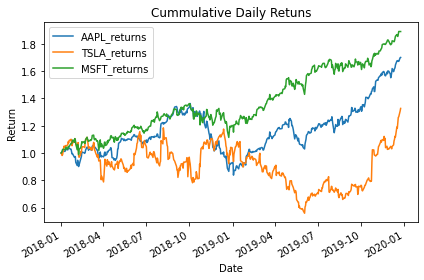

In [15]:
cum_returns = (returns + 1).cumprod()
cum_returns.plot(title="Cummulative Daily Retuns", ylabel="Return")
plt.tight_layout()
plt.show()

## Create a function to generate Fibonacci series. (5)

In [2]:
def fibonacci(n):
  """Returns the number in the n of the fibonacci series"""
  if n <= 1:
    return n
  else:
    return (fibonacci(n - 1) + fibonacci(n - 2))


In [5]:
fibonacci_nums = []

for num in range(20):
  fibonacci_nums.append(fibonacci(num))

print(fibonacci_nums)


[0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377, 610, 987, 1597, 2584, 4181]


## Create a list for student names, marks for 2 subjects, and print out the percentage and if the student passed or failed. (5)

In [18]:
passing_perc = 50

students = ["Vikram", "Emma", "Jake", "Chris"]

percentage = {
  "Math": [90, 49, 71, 63],
  "Computers": [95, 79, 25, 62]
}


for i, name in enumerate(students):

  for sub in percentage.items():

    sub_perc = percentage[sub[0]][i]

    if sub_perc >= passing_perc:
      print(f"{name} passed in {sub[0]} with {sub_perc}%")
    else:
      print(f"{name} failed in {sub[0]} with {sub_perc}%")


Vikram passed in Math with 90%
Vikram passed in Computers with 95%
Emma failed in Math with 49%
Emma passed in Computers with 79%
Jake passed in Math with 71%
Jake failed in Computers with 25%
Chris passed in Math with 63%
Chris passed in Computers with 62%
